In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

np.random.seed(1618)
plt.style.use('ggplot')

In [2]:
# Initial Data Read

df = pd.read_csv('train.csv')

# Categorical Data Label Dictionaries
color = pd.read_csv('color_labels.csv')
breed = pd.read_csv('breed_labels.csv')
state = pd.read_csv('state_labels.csv')
typedic = {1:'dog', 2:'cat'}
genderdic = {1:'Male', 2:'Female', 3:'Mixed'}
maturitydic = {1:'Small', 2:'Medium', 3:'Large', 4:'Extra Large', 0:'Not Specified'}
furdic = {1:'Short', 2:'Medium', 3:'Long', 4:'Not Specified'}
vaccdic = {1:'Vaccinated', 2:'Not Vaccinated', 3:'No Info'}
wormdic = {1:'De-wormed', 2:'Not de-wormed', 3:'No Info'}
sterildic = {1:'Sterilized', 2:'Not sterilized', 3:'No Info'}
healthdic = {1:'Healthy', 2:'Minor Injury', 3:'Serious Injury', 0:'Not Specified'}
adoptiondic = {0:  'First Day', 1: '1-7 Days', 2: '8-30 Days', 3:'31-90 Days', 4:'No Adoption'}
colordict = {0: 'NaN', 1: 'Black', 2: 'Brown', 3:'Golden', 4:'Yellow', 5:'Cream', 6:'Gray', 7:'White'}

df.head(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0


In [3]:
# Next 3 cells are for defining data properties, shape, size and desriptives.

list(df.columns)

['Type',
 'Name',
 'Age',
 'Breed1',
 'Breed2',
 'Gender',
 'Color1',
 'Color2',
 'Color3',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Quantity',
 'Fee',
 'State',
 'RescuerID',
 'VideoAmt',
 'Description',
 'PetID',
 'PhotoAmt',
 'AdoptionSpeed']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [5]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


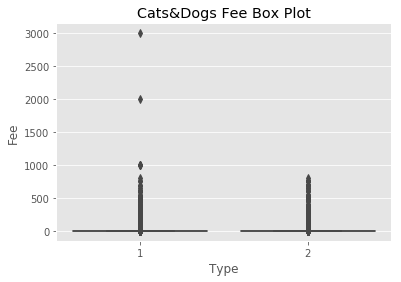

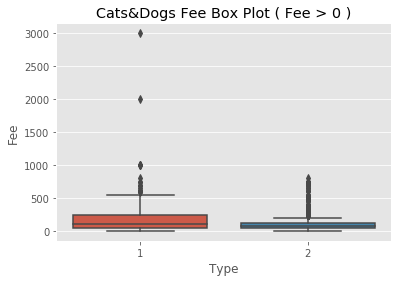

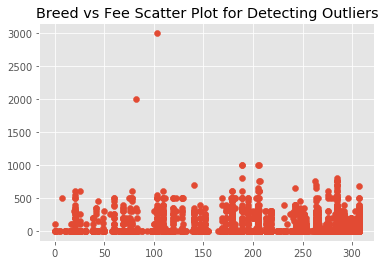

In [6]:
sns.boxplot(x=df.Type, y=df.Fee)
plt.title('Cats&Dogs Fee Box Plot')
plt.show()
sns.boxplot(x=df.Type, y=df[df.Fee > 0].Fee)
plt.title('Cats&Dogs Fee Box Plot ( Fee > 0 )')
plt.show()
plt.scatter(x=df.Breed1, y=df.Fee)
plt.title('Breed vs Fee Scatter Plot for Detecting Outliers')
plt.show()

# There are only couple of data pointsfor dogs, can be accepted as outliers, although outliers seems pretty random, needs special attention. Especially two data point shows clear outlier figures.

In [7]:
df[df.Fee >= 1000]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
2078,1,Rottweiler - Adoption,8,189,0,2,1,0,0,3,...,1,1,1000,41326,9c895e51a0b8d0290bc3936f3f21fede,0,Open for Adoption with Fees Looking for new lo...,ecad98f44,1.0,2
4844,1,Coda,7,206,0,2,6,7,0,3,...,1,1,1000,41335,d2a7c2889579271a07100d5668f5cf8f,0,She is pure breed Siberian husky. Born at July...,0038c9343,5.0,2
8722,1,Khaleesi And Drogo,4,103,0,3,1,2,0,3,...,1,2,3000,41325,39d5c79a7422fa53b8fdeaec67b3dbda,0,Both pups are family home trained. They love t...,e74dd0579,5.0,3
8834,1,Adpoted,24,205,0,2,1,2,7,1,...,1,1,1000,41401,67f04f1dc1f81ff09e134fb47a053b10,0,adpoted,aebf47483,2.0,0
8879,1,Rottweiler Semi-Adult - Adoption,8,189,0,2,1,0,0,3,...,1,1,1000,41326,9c895e51a0b8d0290bc3936f3f21fede,0,Looking for new lovely home due to owner lack ...,c3b94defa,2.0,1
10477,1,Bull Dog,24,82,0,1,2,5,7,2,...,1,1,2000,41401,a1c7a4f20bb936fcb8d97039741c40be,0,Found this bull dog near my neighbourhood for ...,31a77d7ba,3.0,1


# There are 6 observations outliers for the price variable.

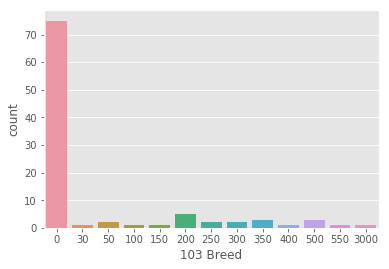

Priced pet cost average:  390.43 (Free pets are excluded)
Priced pet cost median:  250.0 (Free pets are excluded)


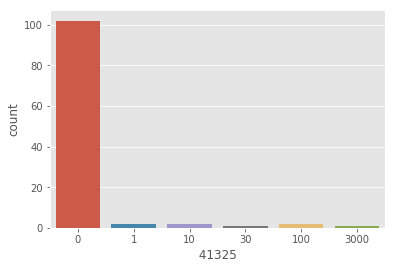

Priced pet cost average:  406.5 (Free pets are excluded)
Priced pet cost median:  20.0 (Free pets are excluded)


In [8]:
# $3000 outlier detail look.

sns.countplot(df[df.Breed1 == 103].Fee)
plt.xlabel(' 103 Breed ')
plt.show()

df103 = df[df.Breed1 == 103]
print('Priced pet cost average: ', round(df103[df103.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df103[df103.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41325].Fee)
plt.xlabel(' 41325 ')
plt.show()

df41325 = df[df.State == 41325]
print('Priced pet cost average: ', round(df41325[df41325.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41325[df41325.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# Graphs shows that for both 103 coded breed and state 41325 have no data points showing that 3000 is acceptable data observation, this point is clearly an outlier.

# Among 103 breed, although most of the pets are free, the ones with adoption fees are between 30 - 550, 

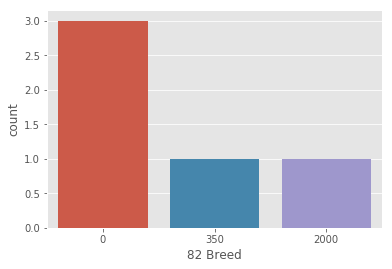

Priced pet cost average:  1175.0 (Free pets are excluded)
Priced pet cost median:  1175.0 (Free pets are excluded)


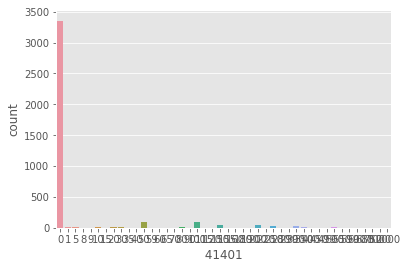

Priced pet cost average:  149.89 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [9]:
# $2000 outlier detail look.

sns.countplot(df[df.Breed1 == 82].Fee)
plt.xlabel(' 82 Breed ')
plt.show()

df82 = df[df.Breed1 == 82]
print('Priced pet cost average: ', round(df82[df82.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df82[df82.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41401].Fee)
plt.xlabel(' 41401 ')
plt.show()

df41401 = df[df.State == 41401]
print('Priced pet cost average: ', round(df41401[df41401.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41401[df41401.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# Countplot shows that there are only two 82 coded Breed dogs available in the data set and one is without fee, other is 2000. The state wise pet prices are not high either, with mean 139.6 and median 100. 2000 fee can be accepted as outlier.

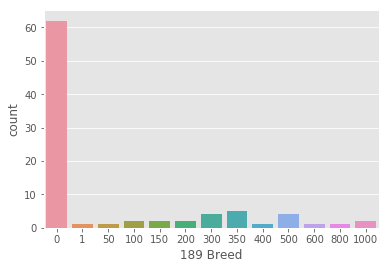

Priced pet cost average:  373.12 (Free pets are excluded)
Priced pet cost median:  350.0 (Free pets are excluded)


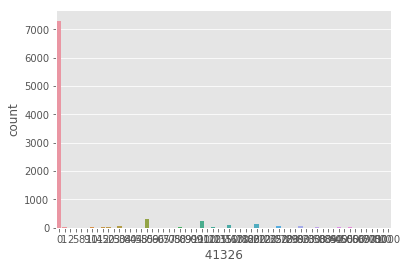

Priced pet cost average:  139.91 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [10]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 189].Fee)
plt.xlabel(' 189 Breed ')
plt.show()

df189 = df[df.Breed1 == 189]
print('Priced pet cost average: ', round(df189[df189.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df189[df189.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41326].Fee)
plt.xlabel(' 41326 ')
plt.show()

df41326 = df[df.State == 41326]
print('Priced pet cost average: ', round(df41326[df41326.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41326[df41326.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 189 breed prices are somewhat equally spreaded from 1 to 1000 and has a mean of 375 and median of 300. Among the same breed 1000 case might be real observation.
# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can't be counted as outlier.

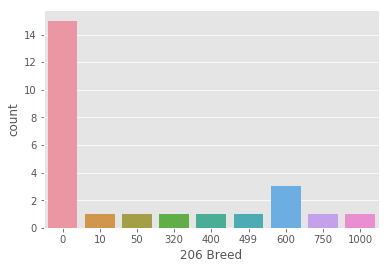

Priced pet cost average:  482.9 (Free pets are excluded)
Priced pet cost median:  549.5 (Free pets are excluded)


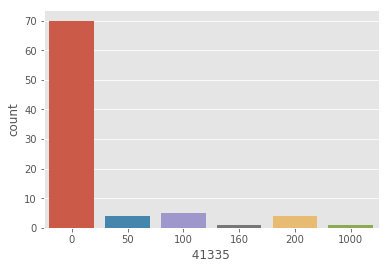

Priced pet cost average:  177.33 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [11]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 206].Fee)
plt.xlabel(' 206 Breed ')
plt.show()

df206 = df[df.Breed1 == 206]
print('Priced pet cost average: ', round(df206[df206.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df206[df206.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41335].Fee)
plt.xlabel(' 41335 ')
plt.show()

df41335 = df[df.State == 41335]
print('Priced pet cost average: ', round(df41335[df41335.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41335[df41335.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 206 breed prices are somewhat equally spreaded from 50 to 1000 and has a mean of 535 and median of 600. Among the same breed 1000 case might be real observation.

# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can't be counted as outlier.

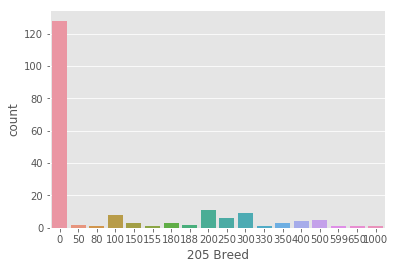

Priced pet cost average:  268.23 (Free pets are excluded)
Priced pet cost median:  225.0 (Free pets are excluded)


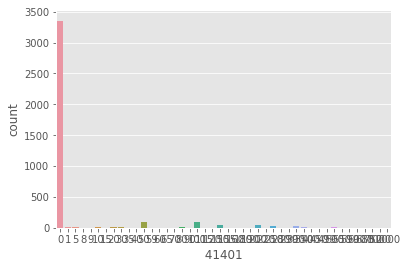

Priced pet cost average:  149.89 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [12]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 205].Fee)
plt.xlabel(' 205 Breed ')
plt.show()

df205 = df[df.Breed1 == 205]
print('Priced pet cost average: ', round(df205[df205.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df205[df205.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41401].Fee)
plt.xlabel(' 41401 ')
plt.show()

df41401 = df[df.State == 41401]
print('Priced pet cost average: ', round(df41401[df41401.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41401[df41401.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 205 breed prices are somewhat  spreaded from 100 to 1000 and has a mean of 337 and median of 300. Among the same breed 1000 case might be real outlier.

# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can be counted as outlier. But decision needs to be made.

# Among all possible outliers in Fee variable, only two records will be discarded as recordin errors.

In [13]:
# Outliers in Fee variable are excluded.

df = df[df.Fee <= 1000]

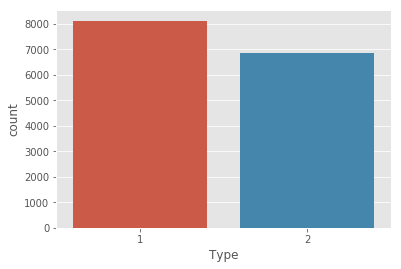

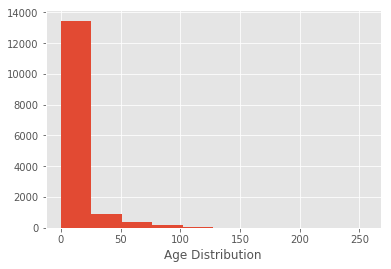

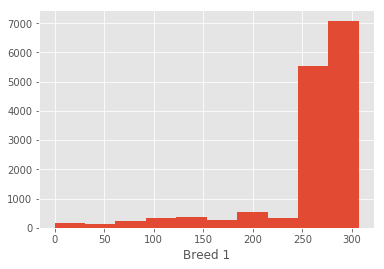

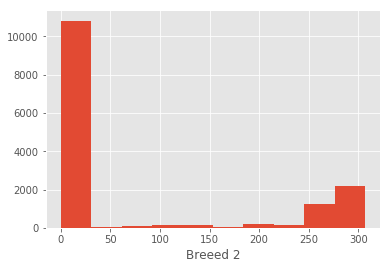

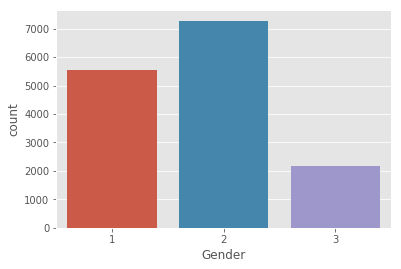

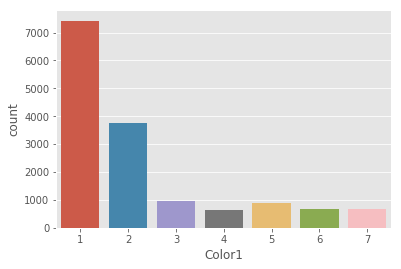

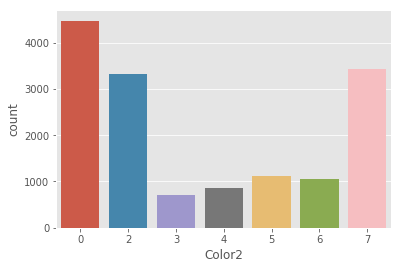

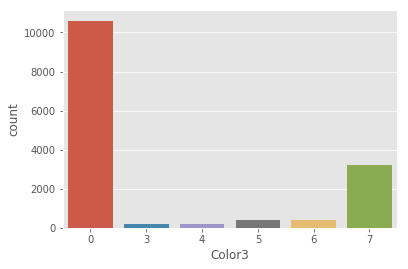

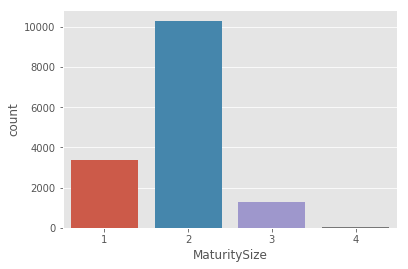

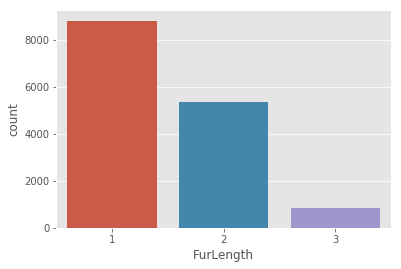

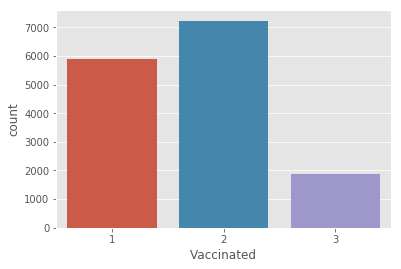

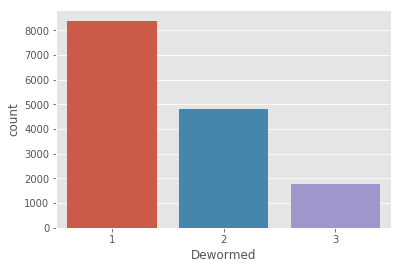

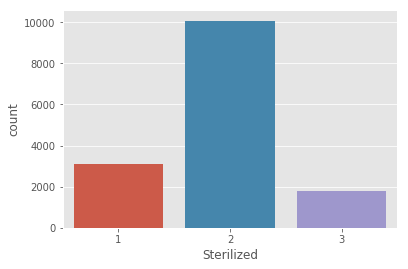

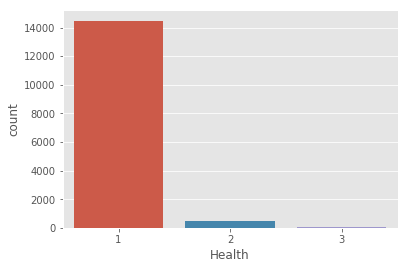

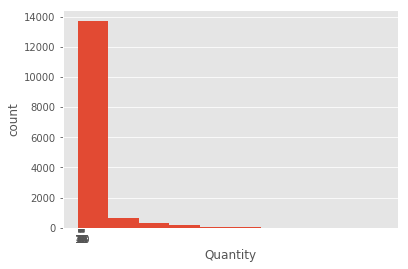

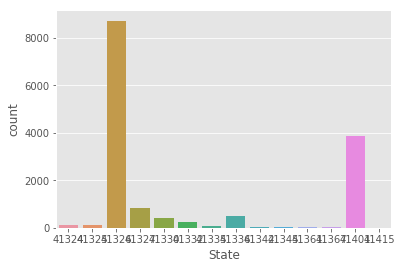

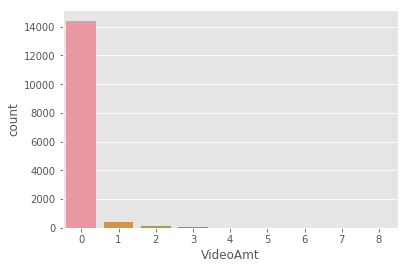

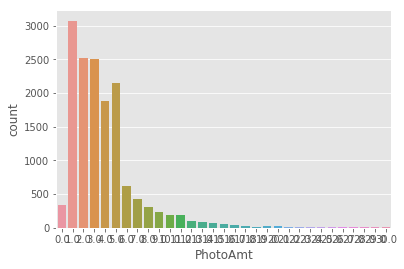

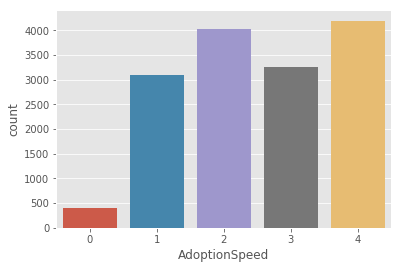

In [14]:
# Visual EDA, count plots for all variables. 
# Checking for imbalanced, skewed data. Detecting outliers.

j1 = sns.countplot(df.Type)
j1 = plt.show()
j2 = plt.hist(df.Age)
j2 = plt.xlabel('Age Distribution')
j2 = plt.show()
j3 = plt.hist(df.Breed1)
j3 = plt.xlabel('Breed 1')
j3 = plt.show()
j4 = plt.hist(df.Breed2)
j4 = plt.xlabel('Breeed 2')
j4 = plt.show()

for i in df.columns[5:16]:
    plt.figure()
    sns.countplot(df[i])

j5 = plt.hist(df.Fee)
j5 = plt.show()
j6 = sns.countplot(df.State)
j6 = plt.show()
j7 = sns.countplot(df.VideoAmt)
j7 = plt.show()

for i in df.columns[22:24]:
    plt.figure()
    sns.countplot(df[i])


## Age looks like exponential distribution, most of the pets rescued are puppies or kittens. There are extreme points 225 months old. 
# Outlier inspection is needed.

## Breed is highly complex and skewed. Most of the breeds are either, mixed breeds or unknown. 
# Upon further analyse, mixed breeds label might be disgregarded.

## Not all pets have secondary and third colors. First color variable is from 1-7, other 2 color variables has big pile on color code 0.
# This also needs to be taken into consideration, for further analyses.

## MaturitySize might have an outlier, most of the data is coded for the first three codes.

## Health also has couple extereme codes, might be an outlier.

## Quantity variable has almost no distribution. Almost all pets are only one.

## Statewise distribution is imbalanced. Might have demographic or economic reasons behind.

## Almost no pets have video.

## Picture amount varies but there might be extreme cases.

## Adoption speed seems consistent. But PetSaver focuses on identifying adoption logic and increasing the speed of adoption. And the time frame between codes are different. Time definitely has some effect on adoption. This might be modelled too.

In [15]:
# For computational ease, string variables are seperated.

df = df.drop(['RescuerID', 'PetID'], axis=1)

desc = df.pop('Description')
name = df.pop('Name')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14991 entries, 0 to 14992
Data columns (total 20 columns):
Type             14991 non-null int64
Age              14991 non-null int64
Breed1           14991 non-null int64
Breed2           14991 non-null int64
Gender           14991 non-null int64
Color1           14991 non-null int64
Color2           14991 non-null int64
Color3           14991 non-null int64
MaturitySize     14991 non-null int64
FurLength        14991 non-null int64
Vaccinated       14991 non-null int64
Dewormed         14991 non-null int64
Sterilized       14991 non-null int64
Health           14991 non-null int64
Quantity         14991 non-null int64
Fee              14991 non-null int64
State            14991 non-null int64
VideoAmt         14991 non-null int64
PhotoAmt         14991 non-null float64
AdoptionSpeed    14991 non-null int64
dtypes: float64(1), int64(19)
memory usage: 3.0 MB


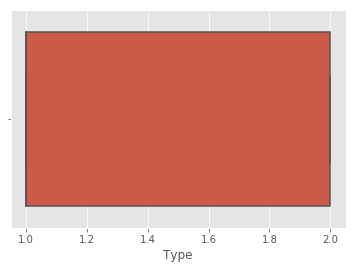

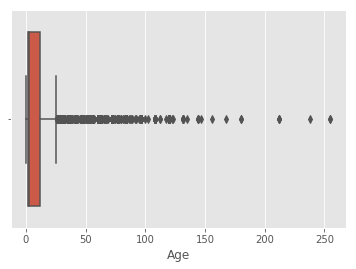

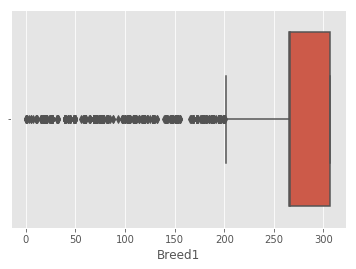

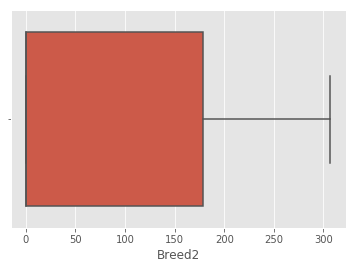

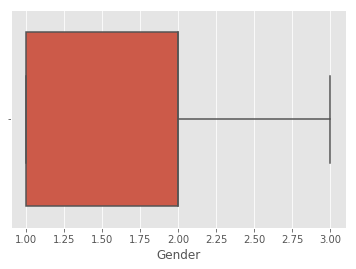

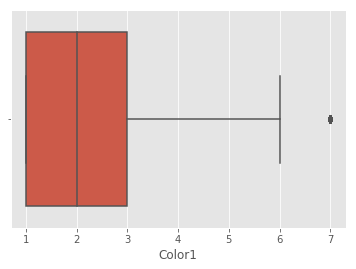

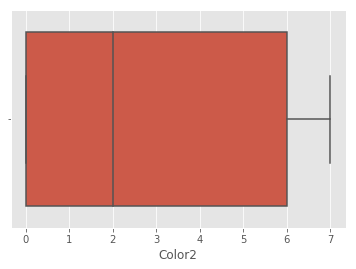

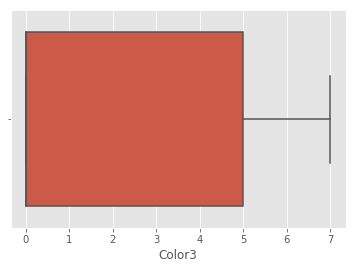

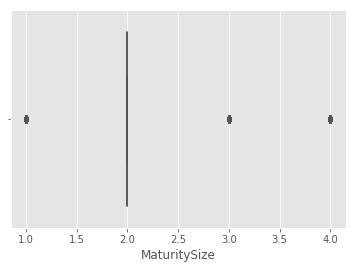

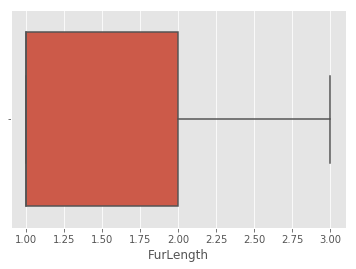

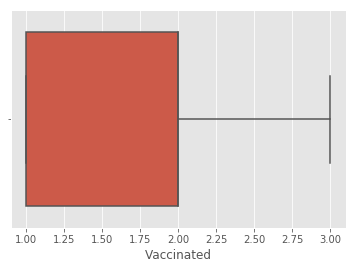

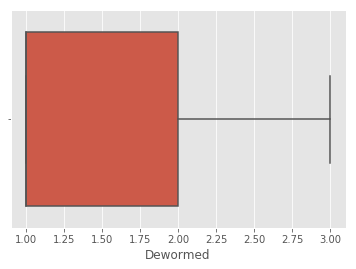

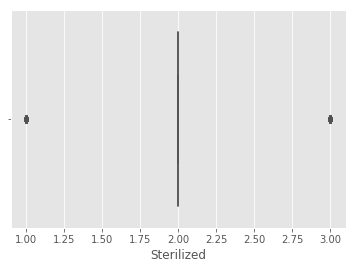

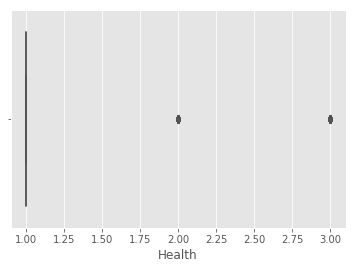

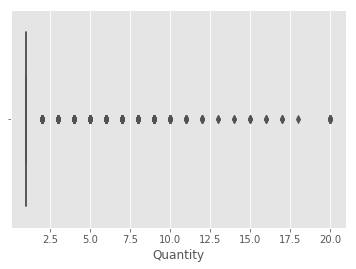

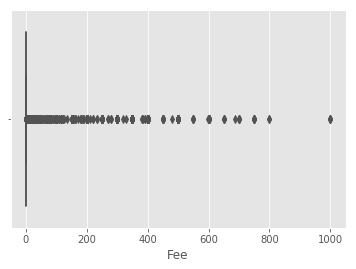

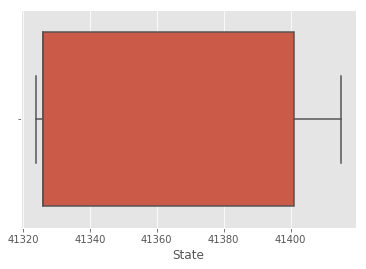

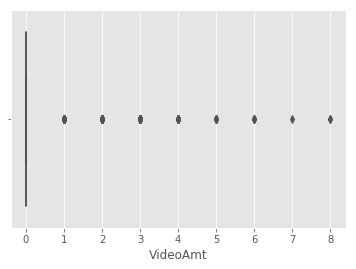

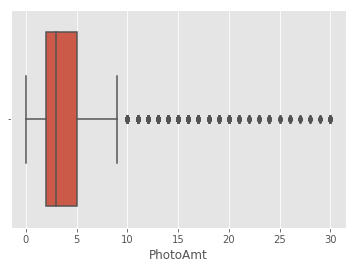

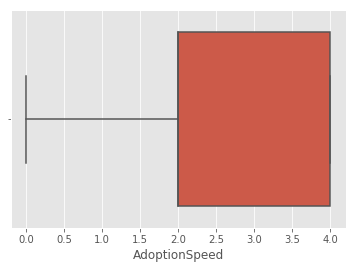

In [16]:
# Boxplots for more in depth visualizations to detect outliers. Not all boxplots will be useful but it is computationally easy to do
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])
    plt.show()



## Since most pets are puppies or kittens, as we identified on the count plots, there are extreme cases in the data. There are too many cases above the IQR, this is because our data is highly skewed. Outliers should be defined with domain knowledge and statistical sense.

## As in the count plots, cumulation towards mixed breeds, holds the IQR on these breed codes.

## Since not too many pets have 2nd breed this data is also, tricky to use.

# Not many boxplots are meaningful, since there are 3 possible cases and all coded accordingly. But this is auto generated plotting, only meaningful plots are taken into consideration.

## Photo amount has some extreme cases, might be labeled as outliers. Count plot also supports.

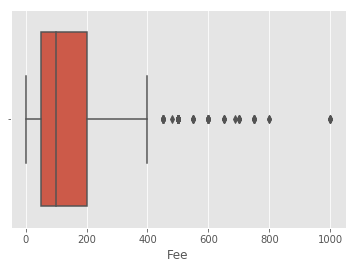

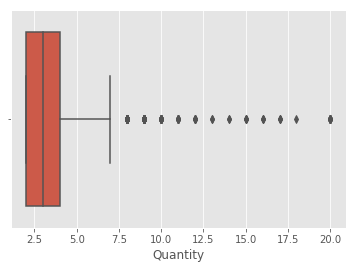

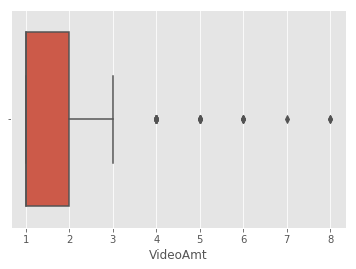

In [17]:
# It seems data has no missing points but some codings are effecting our judgement. For some highly effected variables,
# zero coded cases are treated as missing data points and boxplots are checked for outlie, detection.

sns.boxplot(df[df.Fee > 0].Fee)
plt.show()
sns.boxplot(df[df.Quantity > 1].Quantity)
plt.show()
sns.boxplot(df[df.VideoAmt > 0].VideoAmt)
plt.show()

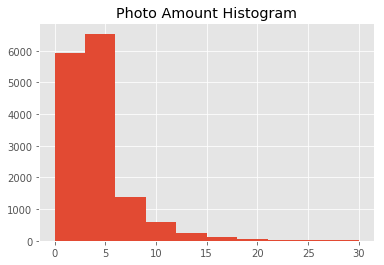

In [18]:
plt.hist(df.PhotoAmt)
plt.title('Photo Amount Histogram')
plt.show()

# Although 1000 data points for price didn't considered as outliers. Non-free price plot also indicates that there are quite some extreme prices, and we will re-evaluate our outlier borders for FEE variable.

# Most of the pets are unique and only one of its kind. Although, above box-plot excluded single pets, there are extreme values.

# Almost all of the data had no VideoAmt, when we exclude 0 cases, there are still couple extreme cases.

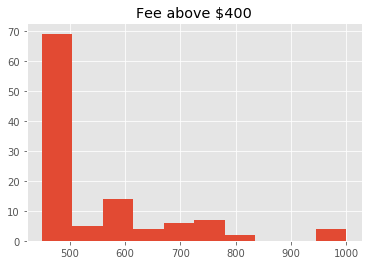

Fee > 400 Count:  111
Fee > 500 Count:  42
Fee > 600 Count:  23
Fee > 700 Count:  13
Fee > 800 Count:  4
Fee > 900 Count:  4
Fee > 1000 Count:  0


In [19]:
# Outliers in the Fee variable.

plt.hist(df[df.Fee > 400].Fee)
plt.title('Fee above $400')
plt.show()

print('Fee > 400 Count: ',df[df.Fee > 400].Fee.count())
print('Fee > 500 Count: ',df[df.Fee > 500].Fee.count())
print('Fee > 600 Count: ',df[df.Fee > 600].Fee.count())
print('Fee > 700 Count: ',df[df.Fee > 700].Fee.count())
print('Fee > 800 Count: ',df[df.Fee > 800].Fee.count())
print('Fee > 900 Count: ',df[df.Fee > 900].Fee.count())
print('Fee > 1000 Count: ',df[df.Fee > 1000].Fee.count())

# $600 seems another good cut point but to be conservative only $1000 cases will be marked as outliers and removed.

df = df[df.Fee < 1000]

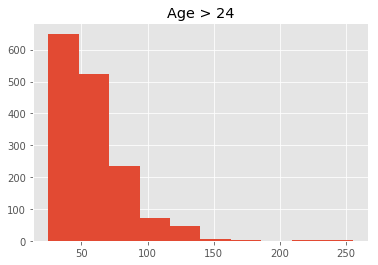

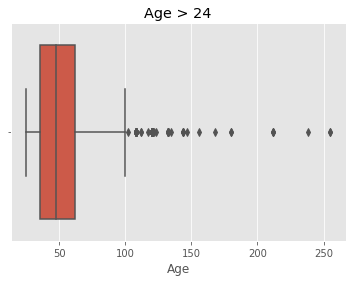

Age > 100 Count:  84
Age > 150 Count:  10
Age > 200 Count:  6
Age > 250 Count:  2


In [20]:
# Outliers in the Age variable.

plt.hist(df[df.Age > 24].Age)
plt.title('Age > 24')
plt.show()
plt.title('Age > 24')
sns.boxplot(df[df.Age > 24].Age)
plt.show()

print('Age > 100 Count: ', df[df.Age > 100].Age.count())
print('Age > 150 Count: ', df[df.Age > 150].Age.count())
print('Age > 200 Count: ', df[df.Age > 200].Age.count())
print('Age > 250 Count: ', df[df.Age > 250].Age.count())

# 100 months old, seems a good cutpoint but 150 months will be defined as outlier threshold.

df = df[df.Age < 150]

In [21]:
# Maturity Size in detail

for i, j in maturitydic.items():
    count = df[df.MaturitySize == i].MaturitySize.count()
    perc = round(count/len(df.MaturitySize),3)
    print(j, ' Count: ', count, ' -- Percentage : ', perc ) 

Small  Count:  3393  -- Percentage :  0.227
Medium  Count:  10295  -- Percentage :  0.687
Large  Count:  1256  -- Percentage :  0.084
Extra Large  Count:  33  -- Percentage :  0.002
Not Specified  Count:  0  -- Percentage :  0.0


In [22]:
#Health in detail

for i, j in healthdic.items():
    count = df[df.Health == i].Health.count()
    perc = round(count/len(df.Health),3)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)
    


Healthy  Count:  14462  -- Percentage:  0.966
Minor Injury  Count:  481  -- Percentage:  0.032
Serious Injury  Count:  34  -- Percentage:  0.002
Not Specified  Count:  0  -- Percentage:  0.0


In [23]:
# Checking Adoption Speed

for i, j in adoptiondic.items():
    count = df[df.AdoptionSpeed == i].AdoptionSpeed.count()
    perc = round(count/len(df.AdoptionSpeed),2)
    print(j, ' Count: ', count, ' -- Percentage: ', perc)    


First Day  Count:  409  -- Percentage:  0.03
1-7 Days  Count:  3088  -- Percentage:  0.21
8-30 Days  Count:  4034  -- Percentage:  0.27
31-90 Days  Count:  3254  -- Percentage:  0.22
No Adoption  Count:  4192  -- Percentage:  0.28


In [24]:
# Recoding Color Variable
df.Color3.replace(0, df.Color1, inplace=True)
df.Color2.replace(0, df.Color1, inplace=True)

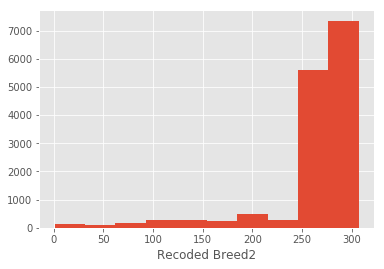

In [26]:
# Recoding Breed variable
df.Breed2.replace(0, df.Breed1, inplace=True)

plt.hist(df.Breed2)
plt.xlabel('Recoded Breed2')
plt.show()